In [1]:
import firedrake as fd
import matplotlib.pyplot as plt
import numpy as np
import meshio

In [2]:
from Poisson_solver import *

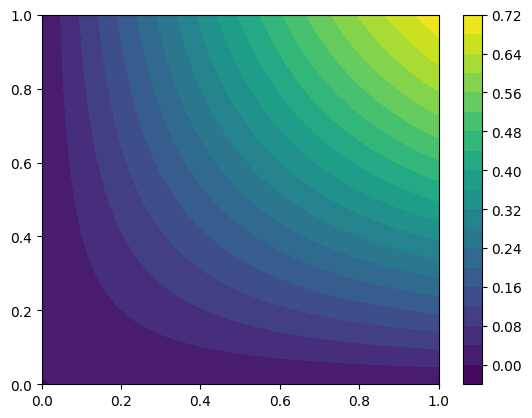

In [3]:
mesh = fd.UnitSquareMesh(50,50)
p = 1
BC = {
    1: lambda x, y: fd.sin(x)*fd.sin(y),  # Dirichlet at x=0 (Left)
    2: lambda x, y: fd.sin(x)*fd.sin(y),  # Dirichlet at x=1 (Right)
    3: lambda x, y: -fd.sin(x)*fd.cos(y),  # Neumann at y=0 (Bottom)
    4: lambda x, y: fd.sin(x)*fd.cos(y),  # Neumann at y=1 (Top)
}
firedrake_sol = solve_poisson_2d(
    mesh, p,
    lambda x, y: -2 * fd.sin(x)*fd.sin(y),  # RHS function
    [1, 2],  # Dirichlet boundaries
    [3, 4],  # Neumann boundaries
    BC
)
plt.colorbar(fd.tricontourf(firedrake_sol, levels = 20))

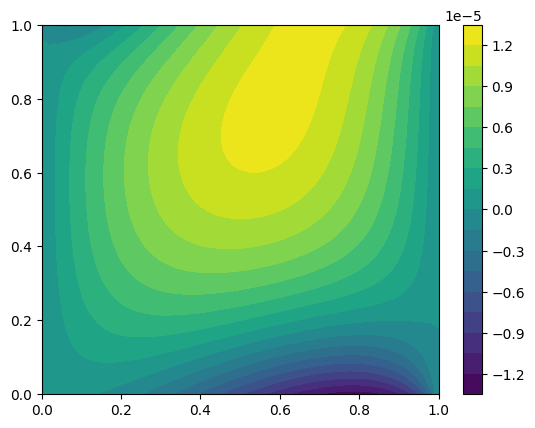

In [4]:

V = fd.FunctionSpace(mesh, "CG", p)
true_sol = fd.Function(V)
x,y = fd.SpatialCoordinate(mesh)

true_sol.assign(fd.assemble(interpolate(fd.sin(x)*fd.sin(y), V)))
true_sol -= firedrake_sol
plt.colorbar(fd.tricontourf(true_sol, levels = 20))

NameError: name 'triplot' is not defined

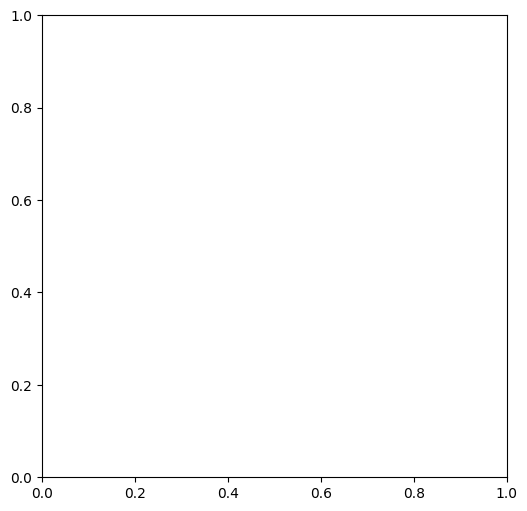

In [5]:
fig, ax = plt.subplots(figsize = (6,6))
triplot(mesh, axes = ax)

for i,point in enumerate(mesh.coordinates.dat.data_ro):
    ax.text(point[0] + 6e-3, point[1]+6e-3, i)

plt.show()